In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
start = '2000-01-01'
end = '2019-12-31'

df = data.DataReader('^NSEI', 'yahoo', start, end)
df.head()
# df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [78]:
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,51.835709,47.800831,49.813290,49.982655,44871361.0
1,54.336334,50.062355,50.316402,53.952770,22942874.0
2,56.528118,54.321388,55.168217,54.495735,18342897.0
3,55.591629,51.591621,55.412300,52.239197,15319808.0
4,53.798351,51.746044,52.284027,52.802086,9232276.0


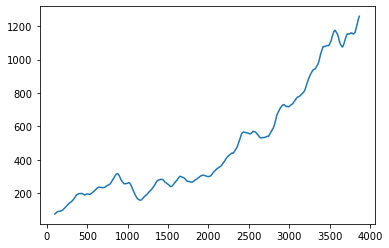

In [5]:
ma100 = df.Close.rolling(100).mean().plot()
ma100 = df.Close.rolling(100).mean()
# ma100


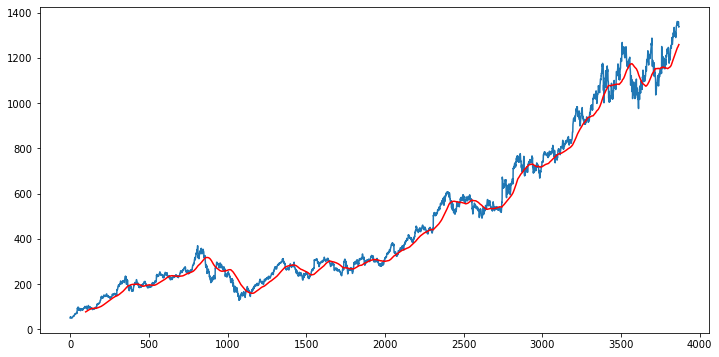

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

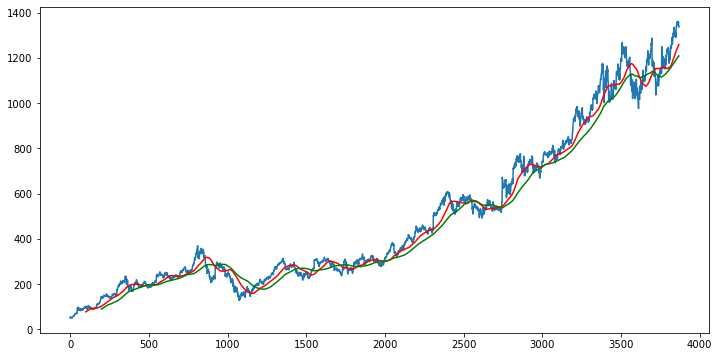

In [7]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [82]:
df.shape

(3869, 5)

In [8]:
# Spliting the data into training and testing data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2708, 1)
(1161, 1)


In [117]:
data_training.head()

,Close
0,49.982655
1,53.952770
2,54.495735
3,52.239197
4,52.802086


In [94]:
data_testing.head()

,Close
2708,540.109985
2709,532.320007
2710,539.789978
2711,539.780029
2712,532.109985


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2708, 1)

In [25]:
X_train = []
y_train = []

In [26]:
for i in range (100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

100

In [13]:
# Ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [1]:
model=Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=20, activation='relu', return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=30, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=40, activation='relu', return_sequences=True))
model.add(Dropout(0.35))

model.add(Dense(units=1))


NameError: name 'Sequential' is not defined

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 110)          92840     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 110)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 120)          110880    
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 120)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100, 130)         

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
82/82 [==============================] - 112s 1s/step - loss: 0.0540 - accuracy: 3.1825e-04
Epoch 2/50
82/82 [==============================] - 94s 1s/step - loss: 0.0158 - accuracy: 3.5660e-04
Epoch 3/50
82/82 [==============================] - 96s 1s/step - loss: 0.0118 - accuracy: 3.6426e-04
Epoch 4/50
82/82 [==============================] - 93s 1s/step - loss: 0.0097 - accuracy: 3.7577e-04
Epoch 5/50
82/82 [==============================] - 94s 1s/step - loss: 0.0087 - accuracy: 3.7193e-04
Epoch 6/50
82/82 [==============================] - 93s 1s/step - loss: 0.0080 - accuracy: 3.7577e-04
Epoch 7/50
82/82 [==============================] - 93s 1s/step - loss: 0.0074 - accuracy: 3.7960e-04
Epoch 8/50
82/82 [==============================] - 87s 1s/step - loss: 0.0071 - accuracy: 3.7960e-04
Epoch 9/50
82/82 [==============================] - 82s 1s/step - loss: 0.0068 - accuracy: 3.7960e-04
Epoch 10/50
82/82 [==============================] - 81s 991ms/step - loss: 521.8

In [34]:
# Save the model
model.save('stock_price_prediction_model_3.h5')

In [56]:
past_100_days = data_testing.tail(100)

In [57]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [59]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [60]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [76]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [82]:
# Making prediction
y_predicted = model.predict(X_test)

In [ ]:
y_predicted.shape


In [ ]:
# Get the factor by which the values are scaled down
scaler.scale_

In [ ]:
scale_factor=1/scaler
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

y_predicted

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


1568
1568
The average is 436.05167
The current price is 421.5827
BUY


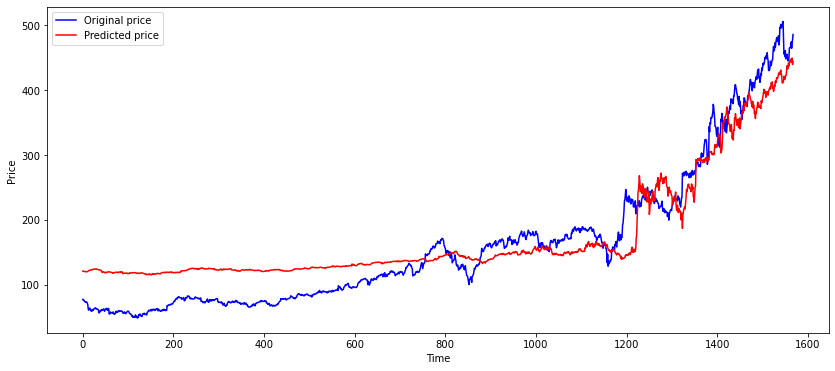

In [12]:
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np

start = '2000-01-01'
end = '2021-10-26'

df = data.DataReader('TECH', 'yahoo', start, end)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.01)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

scaler = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler.fit_transform(data_training)

# Load model
model = load_model('stock_price_prediction_model_4.h5')

past_30_days=data_training.tail(20)

final_df = past_30_days.append(data_testing, ignore_index=True)

input_data = scaler.fit_transform(final_df)

X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-30: i])
    y_test.append(input_data[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
y_predicted = model.predict(X_test)

print(len(y_predicted))
print(len(y_test))

scaler=scaler.scale_
scale_factor=1/scaler[0]

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

n = 0
y_predicted = y_predicted[:, n, n]

values=y_predicted[-20:]
predicted_average=np.mean(values)
print("The average is",predicted_average)

current=y_predicted[-21]
print("The current price is",current)

if current>predicted_average:
  print("SELL")

elif current<predicted_average:
  print("BUY")

else:
  print("NEUTRAL")

plt.figure(figsize=(14,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

    ^NSEI = BUY
    AAPL = SELL
    GOOGL = BUY
    TSLA  = BUY
    NSEI = BUY
    ADSK = SELL
    ADM = SELL
    AEE = SELL
    BRO = BUY
    CAH = SELL
    CBOE = SELL
    TECH = BUY


    Some other models

    i.  stock_price_prediction_model_1.h5
    ii.  stock_price_prediction_model_2.h5
    iii.  stock_price_prediction_model_3.h5
    iv.  stock_price_prediction_model_4.h5  <!-- recommended -->
    v.  keras_first_model.h5
    vi. keras_second_model.h5